# _Importing Dependencies_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
%matplotlib inline

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier



from pycaret.classification import *

import optuna

from boruta import BorutaPy

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# _Importing data_

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.info())
print('\ndescription:\n', df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

##### Unique values for each Column

In [3]:
for col in df.columns:
    print(col, "        " ,df[col].unique())

customerID          ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender          ['Female' 'Male']
SeniorCitizen          [0 1]
Partner          ['Yes' 'No']
Dependents          ['No' 'Yes']
tenure          [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService          ['No' 'Yes']
MultipleLines          ['No phone service' 'No' 'Yes']
InternetService          ['DSL' 'Fiber optic' 'No']
OnlineSecurity          ['No' 'Yes' 'No internet service']
OnlineBackup          ['Yes' 'No' 'No internet service']
DeviceProtection          ['No' 'Yes' 'No internet service']
TechSupport          ['No' 'Yes' 'No internet service']
StreamingTV          ['No' 'Yes' 'No internet service']
StreamingMovies          ['No' 'Yes' 'No internet service']
Contract          ['Month-to-month' 'O

# _Ensuring proper data types_

11
0
median without 0s:  1397.475
mean without 0s:    2283.300440841866

median with 0s:  1394.55
mean with 0s:    2279.7343035638223

median with 0s replaced:  1397.475
mean with 0s replaced:    2281.9169281556156


 count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


[Text(0.5, 1.0, 'Distribution of Total Charges with median imputation')]

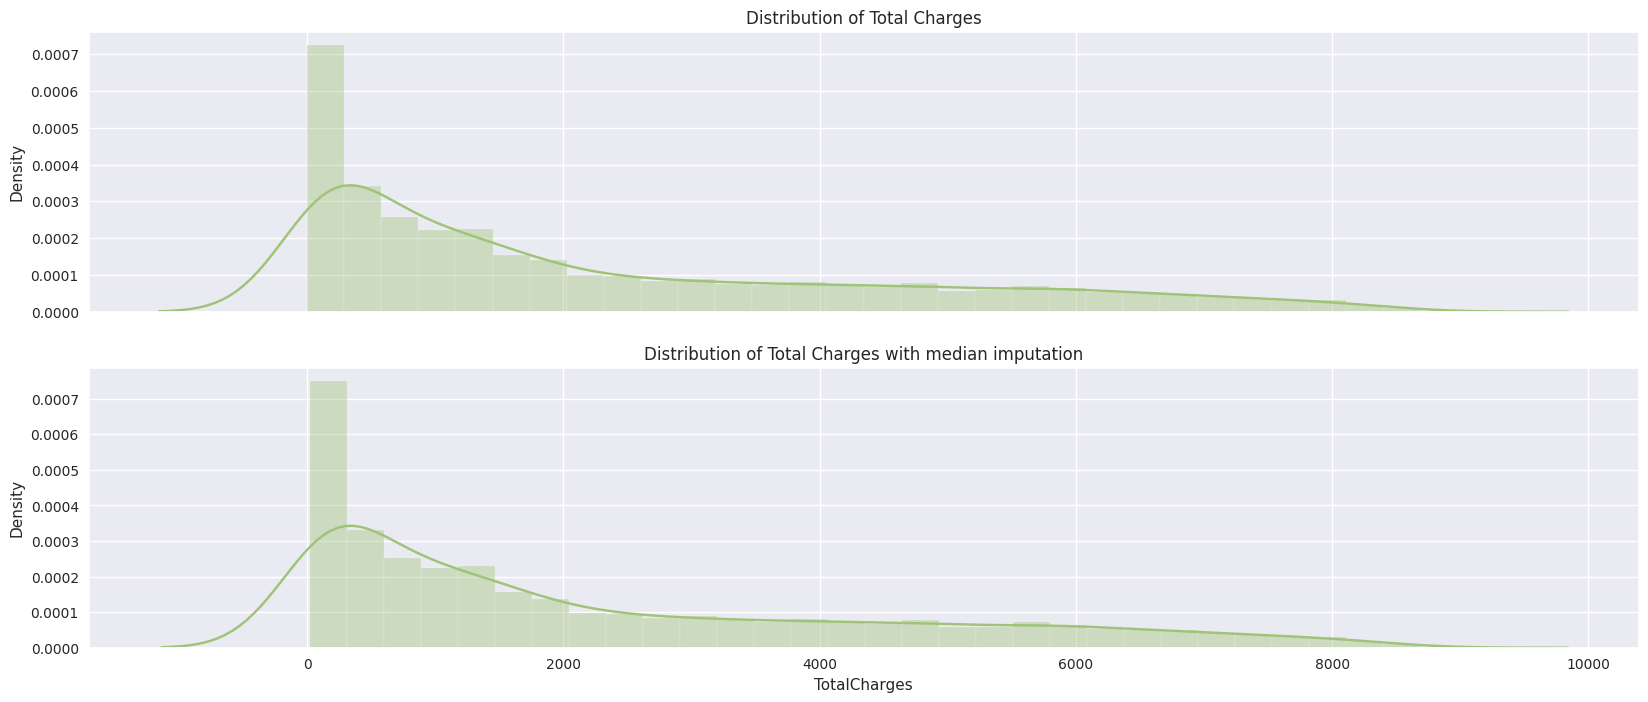

In [4]:
############ Checking number of missing values in the Total Charges column
print((df['TotalCharges'] == ' ').sum()) 

############ Replaceing missing values with '0's and changing the data type to float
df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', '0', df['TotalCharges']).astype(np.float64)
print((df['TotalCharges'] == ' ').sum())         ## ensuring no missing values


### Creating a temp df with no 0s in the Total Charges column
temp_df = df[~(df['TotalCharges'] == 0)]



########### Splitting data for Model training and Visualization

##### Data for Prediction
data1 = df.drop('customerID', axis=1).copy()

print('median without 0s: ', temp_df['TotalCharges'].median())   ## temp df median for Total Charges
print('mean without 0s:   ',   temp_df['TotalCharges'].mean())   ## temp df mean for Total Charges

print('\nmedian with 0s: ', data1['TotalCharges'].median())     ## df median for Total Charges 
print('mean with 0s:   ',   data1['TotalCharges'].mean())       ## df mean for Total CHarges

### Replacing 0s with temp df median
data1['TotalCharges'] = data1['TotalCharges'].replace(0, np.median(temp_df['TotalCharges']))

print('\nmedian with 0s replaced: ', data1['TotalCharges'].median())
print('mean with 0s replaced:   ',   data1['TotalCharges'].mean())

print('\n\n', data1['TotalCharges'].describe())



##### Data for Visualization
data_viz = df.drop('customerID', axis=1).copy()

## Plotting the distribution of Total Charges
sns.set_style('darkgrid')
sns.set_palette(['g'])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (20, 8))

sns.distplot(data_viz['TotalCharges'], ax=ax1, bins=30)
ax1.set(title='Distribution of Total Charges')


### Replacing 0s with median form temp df
data_viz['TotalCharges'] = data_viz['TotalCharges'].replace(0, np.median(temp_df['TotalCharges']))

## Plotting the distribution of Total Charges with median imputation
sns.distplot(data_viz['TotalCharges'], bins=30, ax=ax2)
ax2.set(title='Distribution of Total Charges with median imputation')

# _Encoding categorical features_

In [55]:
data2 = data1.copy()


#### Categorical columns
yes_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

bi_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines'] 

nominal_cols = ['PaymentMethod']
    
#### Order for ordinal features
Internet_order = ['No', 'DSL', 'Fiber optic']
Contract_order = ['Month-to-month', 'One year', 'Two year']



##### Function to convert ordinal features
def onehot_encode(df1, cols):
    df1 = data2.copy()
    for col in cols:
        df_dummy = pd.get_dummies(data=df1[col])
        df1 = df1.drop(col, axis=1)
        df1 = pd.concat([df1, df_dummy], axis=1)
        
    return df1
        

def ordinal_encode(df1, col, order):
    df1 = data2.copy()
    
    df1[col] = [order.index(x) for x in df1[col]]
        
    return df1


##### Function to convert binary Yes and No to 1s and 0s 
def binary_encode(df1, cols):
    df1 = data2.copy()
    
    for col in cols:
    
        df1[col] = [1 if x == 'Yes' else 0 for x in df1[col]]
    
    return df1

data2['No phone service'] = [1 if x == 'No phone service' else 0 for x in data2['MultipleLines']]

data2['MultipleLines'] = data2['MultipleLines'].replace('No phone service', 'No')

for col in yes_cols:
    data2['No internet service'] = [1 if x == 'No internet service' else 0 for x in data2[col]]

for col in yes_cols:
    data2[col] = data2[col].replace('No internet service', 'No')

    

data2 = binary_encode(data2, bi_cols+yes_cols) 
data2 = onehot_encode(data2, nominal_cols)
data2 = ordinal_encode(data2, 'InternetService', Internet_order)
data2 = ordinal_encode(data2, 'Contract', Contract_order)

## Encoding Gender column
data2['gender'] = [1 if x == 'Male' else 0 for x in data2['gender']]

data2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             1   
1                 0                1               1             0   
2                 0                1               1             1   
3                 0                1               1             0   
4                 0                2               0             0   
...             ...              ...             ...           ...   
7038              1                1               1             0   
7039              1                2               0             1   
7040              0                1               1             0   
7041              1                2               0             0   
7042              0                2               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    1            0            0                0         1   
2                    0            0            0                0         0   
3                    1            1            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1         1   
7039                 1            0            1                1         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 1            1            1                1         2   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  No phone service  \
0                    1           29.85         29.85      0                 1   
1                    0           56.95       1889.50      0                 0   
2                    1           53.85        108.15      1                 0   
3                    0           42.30       1840.75      0                 1   
4                    1           70.70        151.65      1                 0   
...                ...             ...           ...    ...               ...   
7038                 1           84.80       1990.50      0                 0   
7039                 1          103.20       7362.90      0                 0   
7040                 1           29.60        346.45      0                 1   
7041                 1           74.40        306.60      1                 0   
7042                 1          105.65       6844.50      0                 0   

      No internet service  Bank transfer (automatic)  Credit card (automatic)  \
0                       0                          0                        0   
1                       0                          0                        0   
2                       0                          0                        0   
3                       0     

# _Scaling numerical features_

In [56]:
data3 = data2.copy()


robust_scalar = RobustScaler()
Robust_TC = robust_scalar.fit_transform(X=data3[['TotalCharges', 'MonthlyCharges']], y=data3['Churn'])


min_max = MinMaxScaler()

Scaled_TC = min_max.fit_transform(Robust_TC)

data_scaled = pd.DataFrame(Scaled_TC)
data_scaled.columns = ['TotalCharges', 'MonthlyCharges']

data3 = pd.concat([data_scaled, data3.drop(['MonthlyCharges', 'TotalCharges'], axis=1)], axis=1)
data3

TotalCharges  MonthlyCharges  gender  SeniorCitizen  Partner  \
0         0.001275        0.115423       0              0        1   
1         0.215867        0.385075       1              0        0   
2         0.010310        0.354229       1              0        0   
3         0.210241        0.239303       1              0        0   
4         0.015330        0.521891       0              0        0   
...            ...             ...     ...            ...      ...   
7038      0.227521        0.662189       1              0        1   
7039      0.847461        0.845274       0              0        1   
7040      0.037809        0.112935       0              0        1   
7041      0.033210        0.558706       1              1        1   
7042      0.787641        0.869652       1              0        0   

      Dependents  tenure  PhoneService  MultipleLines  InternetService  \
0              0       1             0              0                1   
1              0      34             1              0                1   
2              0       2             1              0                1   
3              0      45             0              0                1   
4              0       2             1              0                2   
...          ...     ...           ...            ...              ...   
7038           1      24             1              1                1   
7039           1      72             1              1                2   
7040           1      11             0              0                1   
7041           0       4             1              1                2   
7042           0      66             1              0                2   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                  0             1                 0            0   
1                  1             0                 1            0   
2                  1             1                 0            0   
3                  1             0                 1            1   
4                  0             0                 0            0   
...              ...           ...               ...          ...   
7038               1             0                 1            1   
7039               0             1                 1            0   
7040               1             0                 0            0   
7041               0             0                 0            0   
7042               1             0                 1            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  Churn  \
0               0                0         0                 1      0   
1               0                0         1                 0      0   
2               0                0         0                 1      1   
3               0                0         1                 0      0   
4               0                0         0                 1      1   
...           ...              ...       ...               ...    ...   
7038            1                1         1                 1      0   
7039            1                1         1                 1      0   
7040            0                0         0                 1      0   
7041            0                0         0                 1      1   
7042            1                1         2                 1      0   

      No phone service  No internet service  Bank transfer (automatic)  \
0                    1                    0                          0   
1                    0                    0                          0   
2                    0                    0                          0   
3                    1                    0                          1   
4                    0                    0                          0   
...                ...                  ...                        ...   
7038                 0                    0         

# _Train test Split_

In [57]:
data4 = data3.copy()

X_scaled = data4.drop('Churn', axis=1)
y_scaled = data4['Churn']

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,
                                                                                y_scaled, 
                                                                                test_size=0.3, 
                                                                                random_state=14)

In [58]:
kf = KFold(n_splits=10)

# _Feature selection_

### _Using Chi2_

In [59]:
data5 = data4.copy()

X_chi2 = data5.drop('Churn', axis=1)
y_chi2 = data5['Churn']

BestFeatures = SelectKBest(chi2, k=6)
fit = BestFeatures.fit(X_chi2, y_chi2)

Scores = pd.DataFrame(fit.scores_)
df_cols = pd.DataFrame(data5.columns)

f_scores = pd.concat([df_cols, Scores], axis=1)
f_scores.columns = ['Feature', 'Score']

print(f_scores.nlargest(6, 'Score'))

                    Feature         Score
6                    tenure  16278.923685
16                 Contract   1115.780167
22  Credit card (automatic)    426.422767
9           InternetService    350.698613
19         No phone service    286.520193
10           OnlineSecurity    147.295858


### _Using Logistic Regression Coefficients_

In [60]:
X_lr = data5.drop('Churn', axis=1)
y_lr = data5['Churn']

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.33, random_state=42)

model = LogisticRegression(random_state=11, solver='liblinear')
model.fit(X_lr_train, y_lr_train)

LogisticRegression(random_state=11, solver='liblinear')

In [61]:
coefficients = np.mean(model.coef_, axis=0)

importance_threshold = np.quantile(abs(coefficients), q=0.70)

fig = px.bar(
    orientation='h',
    x=coefficients,
    y=X_lr_train.columns,
    color_continuous_scale=[(-1, 'r'), (1, 'b')], 
    labels={'x':'Coefficient Value', 'y':'Feature'},
    title='Feature Importance'
            )
fig.add_vline(x=importance_threshold, line_color='red')
fig.add_vline(x=-importance_threshold, line_color='red')

fig.show()

##### Low inportance features

In [62]:
low_imp_features = X_lr_train.columns[np.abs(coefficients) < importance_threshold]
low_imp_features

Index(['MonthlyCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'No phone service', 'No internet service',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object')

##### Best features

In [63]:
reduced_data = data3.drop(low_imp_features, axis=1).copy()
reduced_data.columns

Index(['TotalCharges', 'PhoneService', 'InternetService', 'OnlineSecurity',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn'],
      dtype='object')

### _Using Boruta_

#### _Function for optmizing hyper parameters before selecting best features_

In [64]:
def gbc_scaled_feats(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 10)
    subsample = trial.suggest_loguniform('subsample', 1e-8, 1.00)
    min_samples_split = trial.suggest_loguniform('min_samples_split', 1e-8, 1.0)
    min_samples_leaf = trial.suggest_loguniform('min_samples_leaf', 1e-8, 0.4999)
    min_weight_fraction_leaf = trial.suggest_loguniform('min_weight_fraction_leaf', 1e-8, 0.4999)
    max_depth = trial.suggest_int('max_depth', 1, 60)
    
    model = GradientBoostingClassifier(
                                        n_estimators = n_estimators, 
                                        learning_rate=learning_rate, 
                                        subsample=subsample, 
                                        min_samples_split=min_samples_split, 
                                        min_samples_leaf=min_samples_leaf,
                                        min_weight_fraction_leaf=min_weight_fraction_leaf,
                                        max_depth=max_depth
    )
    
    model.fit(X_scaled_train, y_scaled_train)
    
    acc = cross_val_score(model, X_scaled_train, y_scaled_train, cv=kf, scoring='accuracy')
    
    return np.mean(acc)

##### Creating study for hyper parameter optimization

In [65]:
study_gbc_scaled_feat = optuna.create_study(direction='maximize')
study_gbc_scaled_feat.optimize(gbc_scaled_feats, n_trials=100)

[I 2022-10-23 21:06:05,006] A new study created in memory with name: no-name-12e9b080-fcab-4311-bc33-2b0ee452cb41
[I 2022-10-23 21:06:05,703] Trial 0 finished with value: 0.7294117647058824 and parameters: {'n_estimators': 128, 'learning_rate': 0.013617063265371718, 'subsample': 0.00026705760999699374, 'min_samples_split': 4.471886812438916e-07, 'min_samples_leaf': 1.9097745005032434e-07, 'min_weight_fraction_leaf': 0.047272615105808845, 'max_depth': 41}. Best is trial 0 with value: 0.7294117647058824.
[I 2022-10-23 21:06:08,191] Trial 1 finished with value: 0.7294117647058824 and parameters: {'n_estimators': 484, 'learning_rate': 0.007255258656367981, 'subsample': 2.8996413624285252e-08, 'min_samples_split': 8.793222445356077e-05, 'min_samples_leaf': 1.6359459167434038e-07, 'min_weight_fraction_leaf': 8.826326743636308e-06, 'max_depth': 6}. Best is trial 0 with value: 0.7294117647058824.
[I 2022-10-23 21:06:09,052] Trial 2 finished with value: 0.7294117647058824 and parameters: {'n_es

##### Best parameters

In [66]:
study_gbc_scaled_feat.best_params

{'n_estimators': 289,
 'learning_rate': 0.1311692149341797,
 'subsample': 0.3482073562828363,
 'min_samples_split': 0.2608198723769573,
 'min_samples_leaf': 3.0872679289343684e-08,
 'min_weight_fraction_leaf': 0.018634820698962957,
 'max_depth': 13}

In [67]:
gbc_scaled_params = study_gbc_scaled_feat.best_params

##### Initializing Boruta

In [68]:
feat_sel_clf = GradientBoostingClassifier(**gbc_scaled_params)

feat_selector = BorutaPy(feat_sel_clf, n_estimators='auto', random_state=14)

###### Fitting data to the Model

In [69]:
feat_selector.fit(X_scaled_train.values, y_scaled_train.values)

BorutaPy(estimator=GradientBoostingClassifier(learning_rate=0.1311692149341797,
                                              max_depth=13,
                                              min_samples_leaf=3.0872679289343684e-08,
                                              min_samples_split=0.2608198723769573,
                                              min_weight_fraction_leaf=0.018634820698962957,
                                              n_estimators=39,
                                              random_state=RandomState(MT19937) at 0x7F78B02D5840,
                                              subsample=0.3482073562828363),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F78B02D5840)

###### Best features

In [71]:
# Important features
important = list(X_scaled_train.columns[feat_selector.support_])
print(f"Features confirmed as important: {important} \n")

# Tentative features
tentative = list(X_scaled_train.columns[feat_selector.support_weak_])
print(f"Unconfirmed features (tentative): {tentative}\n")

# Unimportant features
unimportant = list(X_scaled_train.columns[~(feat_selector.support_ | feat_selector.support_weak_)])
print(f"Features confirmed as unimportant: {unimportant}")

Features confirmed as important: ['TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'tenure', 'InternetService', 'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'No internet service', 'Electronic check'] 

Unconfirmed features (tentative): ['TechSupport']

Features confirmed as unimportant: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'No phone service', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check']


### _Best features so far_

In [72]:
print(f"Features confirmed as important using Boruta:\n {important} \n\n")

print('logistic regression coefficients:\n', reduced_data.columns,'\n\n')

print('Chi2 results:\n', f_scores.nlargest(6, 'Score'))

Features confirmed as important using Boruta:
 ['TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'tenure', 'InternetService', 'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'No internet service', 'Electronic check'] 


logistic regression coefficients:
 Index(['TotalCharges', 'PhoneService', 'InternetService', 'OnlineSecurity',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn'],
      dtype='object') 


Chi2 results:
                     Feature         Score
6                    tenure  16278.923685
16                 Contract   1115.780167
22  Credit card (automatic)    426.422767
9           InternetService    350.698613
19         No phone service    286.520193
10           OnlineSecurity    147.295858


In [129]:
feature_boruta = pd.DataFrame(important)
feature_boruta.columns = ['Feature']
feature_lr = pd.DataFrame(reduced_data.columns)
feature_lr.columns = ['Feature']

feature_chi2 = pd.DataFrame(f_scores.drop('Score', axis=1)[:6])


best_features_df = feature_lr.merge(feature_boruta, on='Feature', how='inner')
# best_features_df = feature_boruta.merge(feature_chi2, on='Feature', how='inner')
best_features = list(best_features_df['Feature'])
print(best_features)

['TotalCharges', 'InternetService', 'OnlineSecurity', 'StreamingMovies', 'Contract', 'PaperlessBilling']


# _Model Selection_

In [138]:
data_final = pd.concat([data3[best_features], data3['Churn']], axis=1)

In [139]:
X = data_final[best_features]
y = data3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

In [140]:
clf = setup(data=pd.concat([data_final, data3['Churn']]), target='Churn')

In [141]:
compare_models()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2338)

# _Hyper parameter optimization_

### _Function for Hyper parameter tuning_

In [144]:
def gbc_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 10)
    subsample = trial.suggest_loguniform('subsample', 1e-8, 1.00)
    min_samples_split = trial.suggest_loguniform('min_samples_split', 1e-8, 1.0)
    min_samples_leaf = trial.suggest_loguniform('min_samples_leaf', 1e-8, 0.4999)
    min_weight_fraction_leaf = trial.suggest_loguniform('min_weight_fraction_leaf', 1e-8, 0.4999)
    max_depth = trial.suggest_int('max_depth', 1, 60)
    
    model = GradientBoostingClassifier(
                                        n_estimators = n_estimators, 
                                        learning_rate=learning_rate, 
                                        subsample=subsample, 
                                        min_samples_split=min_samples_split, 
                                        min_samples_leaf=min_samples_leaf,
                                        min_weight_fraction_leaf=min_weight_fraction_leaf,
                                        max_depth=max_depth
    )
    
    model.fit(X_train, y_train)
    
    acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    return np.mean(acc)



def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 600)
    max_depth = trial.suggest_int('max_depth', 1, 100)
    
    model = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth
                                  )
    
    model.fit(X_train, y_train)
    
    acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    return np.mean(acc)



def cboost_objective(trial):
    iterations = trial.suggest_int('iterations', 100, 10000)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 10)
    depth = trial.suggest_int('depth', 1, 16)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 1, 10)
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 10, 1000)
    
    model = CatBoostClassifier(iterations=iterations,
                              learning_rate=learning_rate,
                              depth=depth,
                              l2_leaf_reg=l2_leaf_reg,
                              early_stopping_rounds=early_stopping_rounds
                              )
    
    model.fit(X_train, y_train)
    
    acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    return np.mean(acc)



def xgb_objective(trial):
    max_ntree = trial.suggest_int('max_ntree', 1, 100)
    max_depth = trial.suggest_int('max_depth', 1, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 10)
    
    model = XGBClassifier(max_depth=max_depth,
                          learning_rate=learning_rate
                         )
    
    model.fit(X_train, y_train)
    
    acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    return np.mean(acc)

### _optimization with Optuna_

###### Best params for GBC

In [143]:
study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(gbc_objective, n_trials=100)

[I 2022-10-23 21:50:28,402] A new study created in memory with name: no-name-921f6c3e-9e6e-404a-a722-8dee7d74890f
[I 2022-10-23 21:50:29,011] Trial 0 finished with value: 0.7291185361114109 and parameters: {'n_estimators': 116, 'learning_rate': 6.268209782512442e-05, 'subsample': 4.727796262992127e-07, 'min_samples_split': 7.31627537767718e-07, 'min_samples_leaf': 3.4318760009492154e-05, 'min_weight_fraction_leaf': 1.869912846627319e-07, 'max_depth': 21}. Best is trial 0 with value: 0.7291185361114109.
[I 2022-10-23 21:50:30,628] Trial 1 finished with value: 0.36706790456655514 and parameters: {'n_estimators': 288, 'learning_rate': 4.471465135358455, 'subsample': 1.0561518841133036e-08, 'min_samples_split': 0.34916126464977415, 'min_samples_leaf': 4.231270047406941e-08, 'min_weight_fraction_leaf': 2.9522192211177046e-06, 'max_depth': 6}. Best is trial 0 with value: 0.7291185361114109.
[I 2022-10-23 21:50:32,592] Trial 2 finished with value: 0.7291185361114109 and parameters: {'n_estima

###### Best params for Random Forest

In [145]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=100)

[I 2022-10-23 21:55:30,524] A new study created in memory with name: no-name-7b3a08ce-8704-4462-8904-104fc247979a
[I 2022-10-23 21:55:44,610] Trial 0 finished with value: 0.7335793839288928 and parameters: {'n_estimators': 538, 'max_depth': 76}. Best is trial 0 with value: 0.7335793839288928.
[I 2022-10-23 21:55:44,933] Trial 1 finished with value: 0.7291185361114109 and parameters: {'n_estimators': 25, 'max_depth': 1}. Best is trial 0 with value: 0.7335793839288928.
[I 2022-10-23 21:55:55,584] Trial 2 finished with value: 0.7340026629241786 and parameters: {'n_estimators': 413, 'max_depth': 52}. Best is trial 2 with value: 0.7340026629241786.
[I 2022-10-23 21:56:08,143] Trial 3 finished with value: 0.7333670697038397 and parameters: {'n_estimators': 475, 'max_depth': 53}. Best is trial 2 with value: 0.7340026629241786.
[I 2022-10-23 21:56:11,516] Trial 4 finished with value: 0.7433260462773039 and parameters: {'n_estimators': 130, 'max_depth': 14}. Best is trial 4 with value: 0.743326

###### Best params for CatBoost

In [146]:
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(cboost_objective, n_trials=100)

[I 2022-10-23 22:13:48,793] A new study created in memory with name: no-name-dbb663c1-cec8-45a1-8f89-42525b3ffe0b


0:	learn: 0.6931089	total: 49.6ms	remaining: 8m 6s
1:	learn: 0.6930675	total: 50.9ms	remaining: 4m 9s
2:	learn: 0.6930358	total: 51.7ms	remaining: 2m 49s
3:	learn: 0.6929971	total: 52.5ms	remaining: 2m 8s
4:	learn: 0.6929602	total: 53.3ms	remaining: 1m 44s
5:	learn: 0.6929129	total: 54.1ms	remaining: 1m 28s
6:	learn: 0.6928873	total: 54.9ms	remaining: 1m 16s
7:	learn: 0.6928452	total: 55.7ms	remaining: 1m 8s
8:	learn: 0.6928041	total: 56.5ms	remaining: 1m 1s
9:	learn: 0.6927739	total: 57.3ms	remaining: 56.2s
10:	learn: 0.6927326	total: 58.1ms	remaining: 51.8s
11:	learn: 0.6927063	total: 58.8ms	remaining: 48s
12:	learn: 0.6926549	total: 59.4ms	remaining: 44.8s
13:	learn: 0.6926272	total: 60.1ms	remaining: 42.1s
14:	learn: 0.6925829	total: 60.8ms	remaining: 39.7s
15:	learn: 0.6925508	total: 61.5ms	remaining: 37.6s
16:	learn: 0.6925130	total: 62.3ms	remaining: 35.9s
17:	learn: 0.6924693	total: 64.6ms	remaining: 35.2s
18:	learn: 0.6924365	total: 65.3ms	remaining: 33.7s
19:	learn: 0.6923960

[I 2022-10-23 22:15:19,572] Trial 0 finished with value: 0.7291185361114109 and parameters: {'iterations': 9815, 'learning_rate': 7.489043938188389e-05, 'depth': 1, 'l2_leaf_reg': 5, 'early_stopping_rounds': 896}. Best is trial 0 with value: 0.7291185361114109.
[W 2022-10-23 22:15:19,577] Trial 1 failed because of the following error: CatBoostError('catboost/private/libs/options/boosting_options.cpp:79: Learning rate should be non-zero')
Traceback (most recent call last):
  File "/home/anand_ml/anaconda3/envs/pyc/lib/python3.8/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_10068/2987459148.py", line 58, in cboost_objective
    model.fit(X_train, y_train)
  File "/home/anand_ml/anaconda3/envs/pyc/lib/python3.8/site-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/home/

CatBoostError: catboost/private/libs/options/boosting_options.cpp:79: Learning rate should be non-zero

###### Best params for XGBoost

In [147]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=100)

[I 2022-10-23 22:19:00,593] A new study created in memory with name: no-name-cbf86036-6020-497c-88ae-a4f269cb2384
[I 2022-10-23 22:19:06,212] Trial 0 finished with value: 0.7668510921587679 and parameters: {'max_ntree': 19, 'max_depth': 30, 'learning_rate': 0.0014544211139135587}. Best is trial 0 with value: 0.7668510921587679.
[I 2022-10-23 22:19:15,008] Trial 1 finished with value: 0.7543465939760337 and parameters: {'max_ntree': 44, 'max_depth': 66, 'learning_rate': 0.1288673991938906}. Best is trial 0 with value: 0.7668510921587679.
[I 2022-10-23 22:19:24,492] Trial 2 finished with value: 0.7450214113498147 and parameters: {'max_ntree': 55, 'max_depth': 85, 'learning_rate': 0.591732746076672}. Best is trial 0 with value: 0.7668510921587679.
[I 2022-10-23 22:19:29,183] Trial 3 finished with value: 0.7670616071107272 and parameters: {'max_ntree': 30, 'max_depth': 55, 'learning_rate': 8.613042224654385e-06}. Best is trial 3 with value: 0.7670616071107272.
[I 2022-10-23 22:19:34,375] T

#### Best params

In [150]:
gbc_params = study_gbc.best_params

rf_params = study_rf.best_params

catboost_params = study_catboost.best_params

xgb_params = study_xgb.best_params

### Bagging Models

In [151]:
VC = VotingClassifier(estimators=[
    ("gbc", GradientBoostingClassifier(**gbc_params)),
    ("lightgbm", LGBMClassifier()),
    ("rf", RandomForestClassifier(**rf_params)),
    ("catboost", CatBoostClassifier(**catboost_params)),
    ("xgboost", XGBClassifier(**xgb_params)),
    ("lr", LogisticRegression())
], voting='soft')


VC.fit(X_train, y_train)

0:	learn: 0.6931089	total: 1.35ms	remaining: 13.3s
1:	learn: 0.6930675	total: 2.4ms	remaining: 11.8s
2:	learn: 0.6930358	total: 3.06ms	remaining: 10s
3:	learn: 0.6929971	total: 3.7ms	remaining: 9.07s
4:	learn: 0.6929602	total: 4.34ms	remaining: 8.51s
5:	learn: 0.6929129	total: 5ms	remaining: 8.17s
6:	learn: 0.6928873	total: 5.68ms	remaining: 7.96s
7:	learn: 0.6928452	total: 6.32ms	remaining: 7.75s
8:	learn: 0.6928041	total: 6.99ms	remaining: 7.62s
9:	learn: 0.6927739	total: 7.7ms	remaining: 7.55s
10:	learn: 0.6927326	total: 8.37ms	remaining: 7.46s
11:	learn: 0.6927063	total: 9.17ms	remaining: 7.49s
12:	learn: 0.6926549	total: 10ms	remaining: 7.57s
13:	learn: 0.6926272	total: 11ms	remaining: 7.67s
14:	learn: 0.6925829	total: 11.8ms	remaining: 7.73s
15:	learn: 0.6925508	total: 12.7ms	remaining: 7.76s
16:	learn: 0.6925130	total: 13.3ms	remaining: 7.69s
17:	learn: 0.6924693	total: 14ms	remaining: 7.63s
18:	learn: 0.6924365	total: 14.7ms	remaining: 7.57s
19:	learn: 0.6923960	total: 15.3ms	r

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=6.268209782512442e-05,
                                                         loss='deviance',
                                                         max_depth=21,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3.4318760009492154e-05,
                                                         min_samples_split=7.316275

# Results and Evaluation

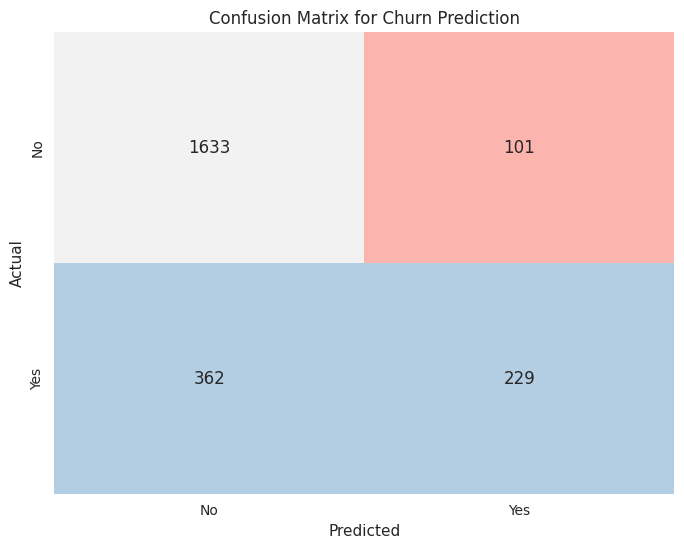

Accuracy: 80.09%

Classification Report:
----------------------
               precision    recall  f1-score   support

          No       0.82      0.94      0.88      1734
         Yes       0.69      0.39      0.50       591

    accuracy                           0.80      2325
   macro avg       0.76      0.66      0.69      2325
weighted avg       0.79      0.80      0.78      2325



In [153]:
y_pred = VC.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=["No", "Yes"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0.5, cmap='Pastel1', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["No", "Yes"])
plt.yticks(ticks=[0.5, 1.5], labels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Churn Prediction")
plt.savefig('Churn.png', bbox_inches='tight', dpi=250)
plt.show()

print('Accuracy: {:.2f}%'.format(accuracy_score(y_true=y_test, y_pred=y_pred) * 100, '%'))

print("\nClassification Report:\n----------------------\n", clr)